In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Viewing Data

In [2]:
# Loading and browsing the dataset
df = pd.read_csv("data/train.csv")
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Learning the dtypes of columns' and how many non-null values are there in those columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Feature Selection

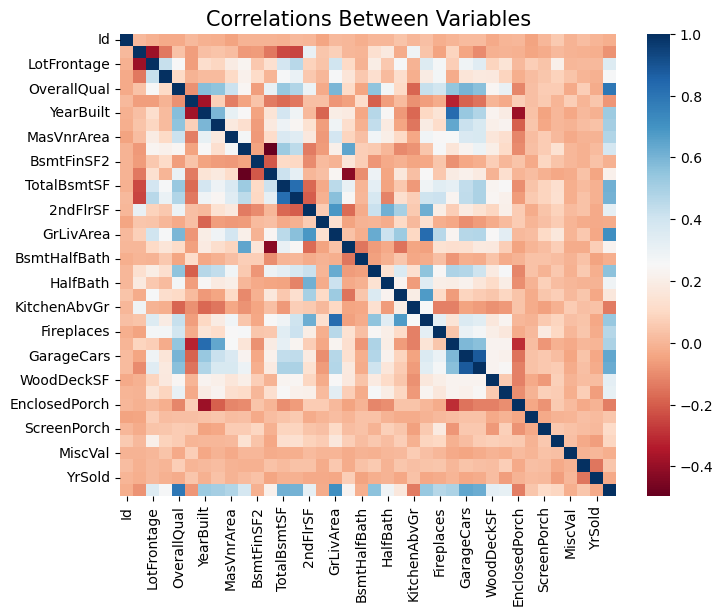

In [4]:
# Visualizing the correlations between numerical variables

plt.figure(figsize=(8,6))
df_numerical = df.select_dtypes(include='number')
sns.heatmap(df_numerical.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [5]:
# Selecting the strong correlations with SalePrice
corr_with_price = df_numerical.corr()["SalePrice"]
correlated_columns = corr_with_price[(corr_with_price>0.70) | (corr_with_price<-0.70)]
correlated_columns

OverallQual    0.790982
GrLivArea      0.708624
SalePrice      1.000000
Name: SalePrice, dtype: float64

In [6]:
# Selecting columns/features 

important_numerical_columns = list(correlated_columns.index)
# important_categorical_columns = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_categorical_columns = ["SaleCondition"] # hand-picked just one for ease
important_columns = important_numerical_columns + important_categorical_columns
df = df[important_columns]
print(important_columns)

['OverallQual', 'GrLivArea', 'SalePrice', 'SaleCondition']


In [7]:
# Checking for missing values
df.isna().sum()

OverallQual      0
GrLivArea        0
SalePrice        0
SaleCondition    0
dtype: int64

# Exploratory Data Analysis

Text(0.5, 0.98, 'Pair plot of features')

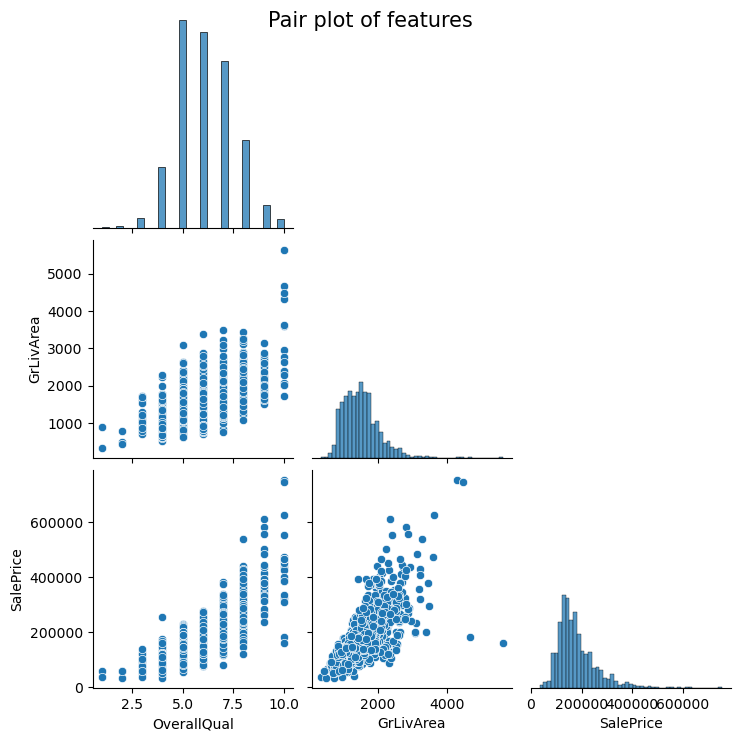

In [8]:
# Visualizing distribution of feature data
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
g = sns.pairplot(df, corner=True)
g.fig.suptitle("Pair plot of features", size=15)

# Data Wrangling

In [9]:
# X-y split
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

# One-Hot Encoding the categorical features
X = pd.get_dummies(X, columns=important_categorical_columns)

# Standardize columns
important_numerical_columns.remove("SalePrice")
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[important_numerical_columns] = scaler.fit_transform(X[important_numerical_columns])

# Training

In [10]:
# Train test random split
from sklearn.model_selection import train_test_split
Xtr, Xt, ytr, yt = train_test_split(X, y, test_size=0.3, random_state=22)

In [11]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(Xtr.to_numpy(), ytr.to_numpy())
ypr = lin_reg.predict(Xt.to_numpy())

In [12]:
from sklearn.metrics import r2_score
r2_score(yt.to_numpy(), ypr)

0.6901231809852499

# Save Scaler and Model

In [13]:
import joblib
joblib.dump(lin_reg, 'ml_housing_model.joblib')
joblib.dump(scaler, 'ml_housing_scaler.joblib')
del lin_reg
del scaler

In [14]:
# Test Model
# Prediction for first row
model = joblib.load('ml_housing_model.joblib')
model.predict(Xt.to_numpy()[0:1]).astype(int)[0]

197952

In [15]:
# Test Scaler
scaler = joblib.load('ml_housing_scaler.joblib')
list(scaler.transform(pd.DataFrame([[7,1717]],columns=['OverallQual','GrLivArea']))[0])

[0.6514792433257054, 0.3836591478699364]